# Hypotheses 2 and 3
Pull requests are reviewed and merged faster by an integrator from the same country.

Pull requests to repositories with teams of many nationalities are merged faster.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kruskal
from cliffs_delta import cliffs_delta

In [26]:
merged_data = pd.read_csv('./data/merged_data.csv', header=0)
merged_data

,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,...,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num,log_mergetime_minutes,log_lifetime_minutes
0,35,1142,saltstack,salt,1,4534,4534.0,1,22,0,...,0,0,49.0,1,0.000622,0,4534,0,8.419580,8.419580
1,41,1142,saltstack,salt,1,983,983.0,1,193,0,...,0,0,3.0,0,0.000013,0,983,0,6.891626,6.891626
2,45,853,rapid7,metasploit-framework,1,131,131.0,1,2,0,...,0,0,159.0,0,0.000023,0,131,0,4.882802,4.882802
3,52,22091370,kubernetes,kubernetes,1,627,627.0,1,8,19,...,0,0,0.0,0,0.000459,0,627,0,6.442540,6.442540
4,60,22091370,kubernetes,kubernetes,1,2760,2760.0,1,10,75,...,3,0,0.0,1,0.021057,0,2760,0,7.923348,7.923348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93368,3347524,1486,ansible,ansible,1,100,100.0,1,4,0,...,0,0,3.0,0,0.010687,0,100,0,4.615121,4.615121
93369,3347645,1486,ansible,ansible,1,487,487.0,2,8,0,...,0,0,67.0,0,0.008142,0,487,0,6.190315,6.190315
93370,3347815,48212908,pandas-dev,pandas,1,63531,63531.0,215,9804,13464,...,17,3,7.0,0,0.000274,1,10204,1,11.059299,11.059299
93371,3347882,20078281,nodejs,node,1,11373,11373.0,4,16,0,...,0,0,197.0,0,0.012812,0,11373,0,9.339085,9.339085


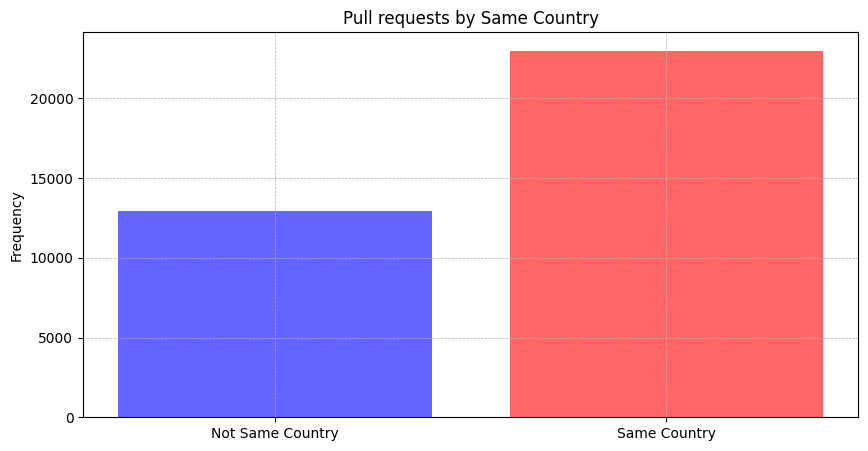

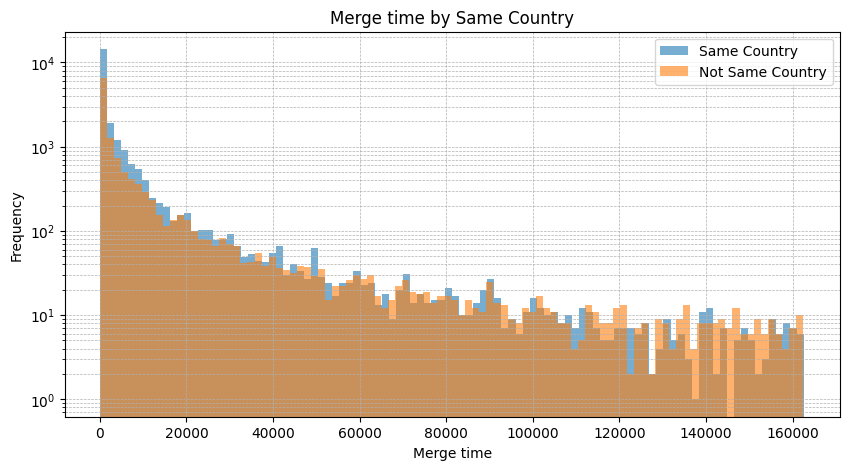

Shapiro-Wilk test for same country, mergetime: W = 0.7998122576965064, p = 0.11405017120604721
Shapiro-Wilk test for not same country, mergetime: W = 0.7520312910693271, p = 0.004485737161479042
Kruskal-Wallis H test, mergetime: H = 647.4616582718644, p = 7.964382764386867e-143
Cliff's delta for mergetime: delta = -0.16157182211988644, p = small
Mean merge time for same country: 7016.745953706926
Mean merge time for not same country: 11465.46615551425
Median merge time for same country: 1009.0
Median merge time for not same country: 1559.5
Standard deviation of merge time for same country: 18517.969811393345
Standard deviation of merge time for not same country: 25013.991072068315
Maximum merge time for same country: 162737.0
Maximum merge time for not same country: 162362.0
Minimum merge time for same country: 16.0
Minimum merge time for not same country: 16.0


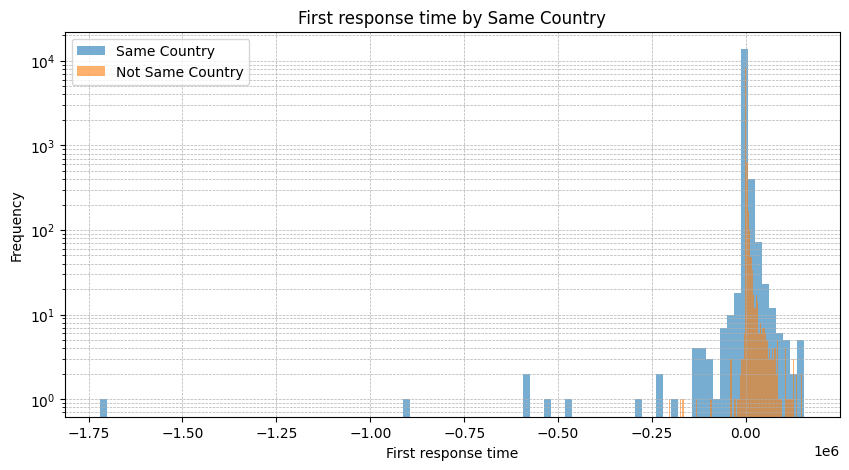

Shapiro-Wilk test for same country, first response: W = 0.7511380853875371, p = 0.0025117475059664995
Shapiro-Wilk test for not same country, first response: W = 0.7536829464613133, p = 0.00814219884662104
Kruskal-Wallis H test, first response: H = 31.143221937305665, p = 2.3967479145805333e-08
Cliff's delta for first response: delta = 0.042593598189665086, p = negligible
Mean first response time for same country: 447.6726789709172
Mean first response time for not same country: 1349.266018185663
Median first response time for same country: 22.0
Median first response time for not same country: 15.0
Standard deviation of first response time for same country: 20302.816884282962
Standard deviation of first response time for not same country: 8661.156999074667
Maximum first response time for same country: 155744.0
Maximum first response time for not same country: 150386.0
Minimum first response time for same country: -1719947.0
Minimum first response time for not same country: -204567.0


In [27]:
same_country = merged_data['same_country'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(same_country.index, same_country.values, alpha=0.6, color=['blue', 'red'])
plt.xticks(same_country.index, ['Not Same Country', 'Same Country'])
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Pull requests by Same Country')
plt.show()

same_country = merged_data[merged_data['same_country'] == 1]
not_same_country = merged_data[merged_data['same_country'] == 0]

plt.figure(figsize=(10, 5))
plt.hist(same_country['mergetime_minutes'], bins=100, alpha=0.6, label='Same Country', log=True)
plt.hist(not_same_country['mergetime_minutes'], bins=100, alpha=0.6, label='Not Same Country', log=True)
plt.xlabel('Merge time')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Merge time by Same Country')
plt.show()

same_country_sample = same_country['mergetime_minutes'].sample(n=3, random_state=1)
not_same_country_sample = not_same_country['mergetime_minutes'].sample(n=3,random_state=1)

res_same_country = shapiro(same_country_sample)
res_not_same_country = shapiro(not_same_country_sample)
print('Shapiro-Wilk test for same country, mergetime: W = {}, p = {}'.format(res_same_country.statistic, res_same_country.pvalue))
print('Shapiro-Wilk test for not same country, mergetime: W = {}, p = {}'.format(res_not_same_country.statistic, res_not_same_country.pvalue))

H, p = kruskal(same_country['mergetime_minutes'], not_same_country['mergetime_minutes'])
print('Kruskal-Wallis H test, mergetime: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(same_country['mergetime_minutes'], not_same_country['mergetime_minutes'])
    print('Cliff\'s delta for mergetime: delta = {}, p = {}'.format(delta, res))

print('Mean merge time for same country: {}'.format(same_country['mergetime_minutes'].mean()))
print('Mean merge time for not same country: {}'.format(not_same_country['mergetime_minutes'].mean()))
print('Median merge time for same country: {}'.format(same_country['mergetime_minutes'].median()))
print('Median merge time for not same country: {}'.format(not_same_country['mergetime_minutes'].median()))
print('Standard deviation of merge time for same country: {}'.format(same_country['mergetime_minutes'].std()))
print('Standard deviation of merge time for not same country: {}'.format(not_same_country['mergetime_minutes'].std()))
print('Maximum merge time for same country: {}'.format(same_country['mergetime_minutes'].max()))
print('Maximum merge time for not same country: {}'.format(not_same_country['mergetime_minutes'].max()))
print('Minimum merge time for same country: {}'.format(same_country['mergetime_minutes'].min()))
print('Minimum merge time for not same country: {}'.format(not_same_country['mergetime_minutes'].min()))

plt.figure(figsize=(10, 5))
plt.hist(same_country['first_response_time'], bins=100, alpha=0.6, label='Same Country', log=True)
plt.hist(not_same_country['first_response_time'], bins=100, alpha=0.6, label='Not Same Country', log=True)
plt.xlabel('First response time')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('First response time by Same Country')
plt.show()

same_country_sample = same_country['first_response_time'].dropna().sample(n=3, random_state=1)
not_same_country_sample = not_same_country['first_response_time'].dropna().sample(n=3,random_state=1)

res_same_country = shapiro(same_country_sample)
res_not_same_country = shapiro(not_same_country_sample)
print('Shapiro-Wilk test for same country, first response: W = {}, p = {}'.format(res_same_country.statistic, res_same_country.pvalue))
print('Shapiro-Wilk test for not same country, first response: W = {}, p = {}'.format(res_not_same_country.statistic, res_not_same_country.pvalue))

H, p = kruskal(same_country['first_response_time'].dropna(), not_same_country['first_response_time'].dropna())
print('Kruskal-Wallis H test, first response: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(same_country['first_response_time'].dropna(), not_same_country['first_response_time'].dropna())
    print('Cliff\'s delta for first response: delta = {}, p = {}'.format(delta, res))

print('Mean first response time for same country: {}'.format(same_country['first_response_time'].mean()))
print('Mean first response time for not same country: {}'.format(not_same_country['first_response_time'].mean()))
print('Median first response time for same country: {}'.format(same_country['first_response_time'].median()))   
print('Median first response time for not same country: {}'.format(not_same_country['first_response_time'].median()))
print('Standard deviation of first response time for same country: {}'.format(same_country['first_response_time'].std()))
print('Standard deviation of first response time for not same country: {}'.format(not_same_country['first_response_time'].std()))
print('Maximum first response time for same country: {}'.format(same_country['first_response_time'].max()))
print('Maximum first response time for not same country: {}'.format(not_same_country['first_response_time'].max()))
print('Minimum first response time for same country: {}'.format(same_country['first_response_time'].min()))
print('Minimum first response time for not same country: {}'.format(not_same_country['first_response_time'].min()))

number of different project ids: 13


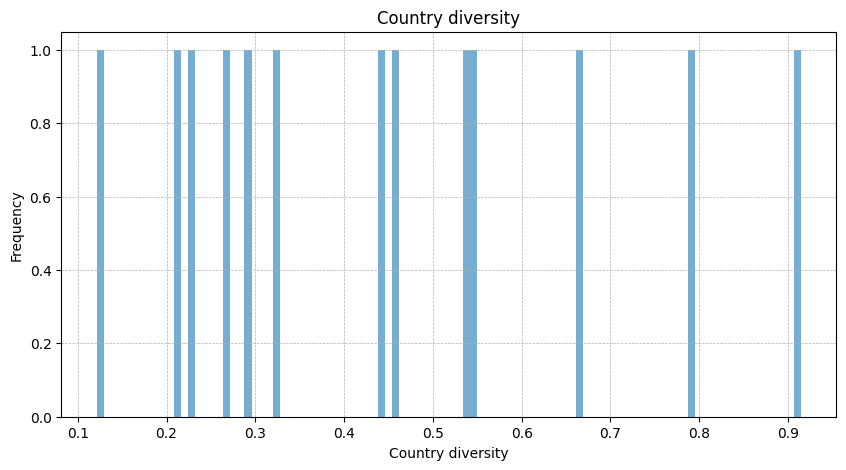

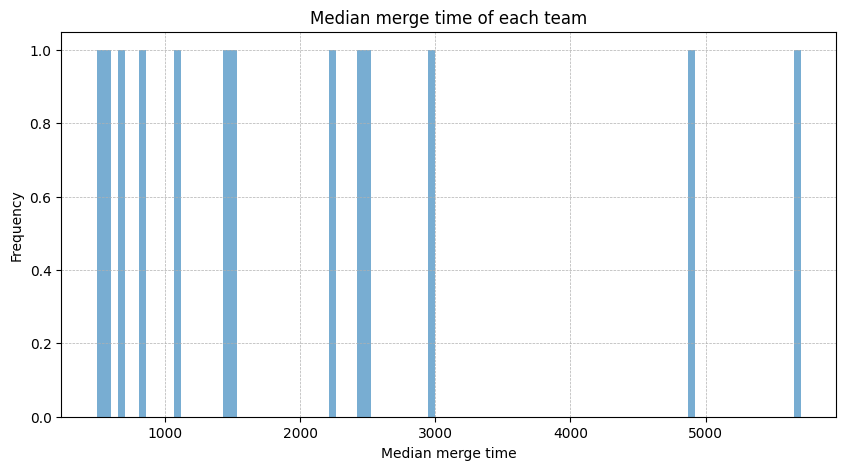

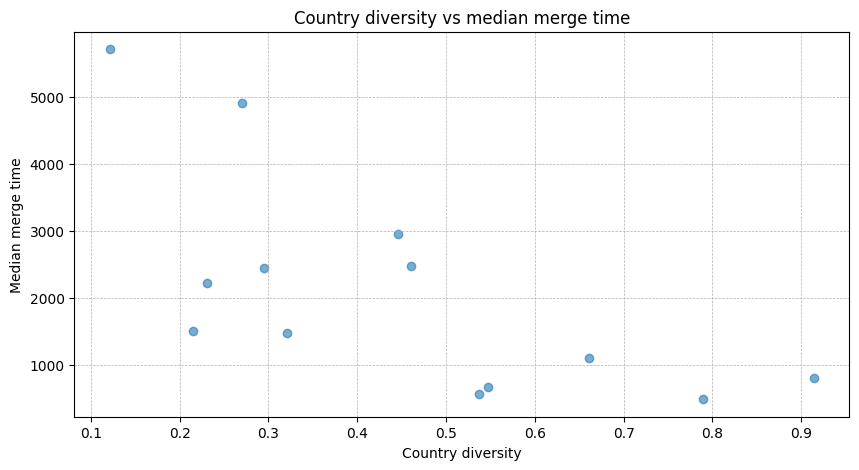

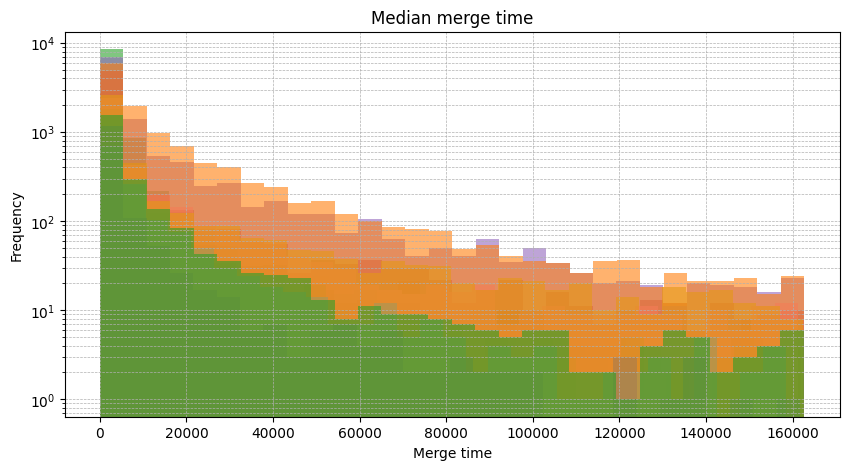

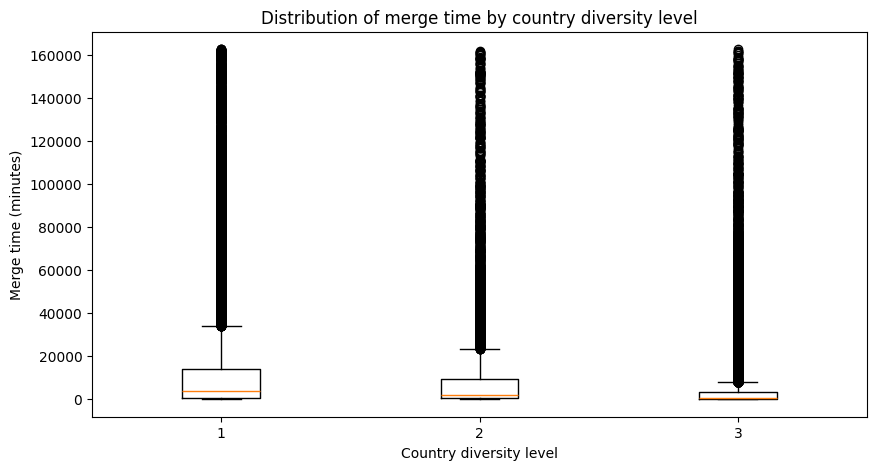

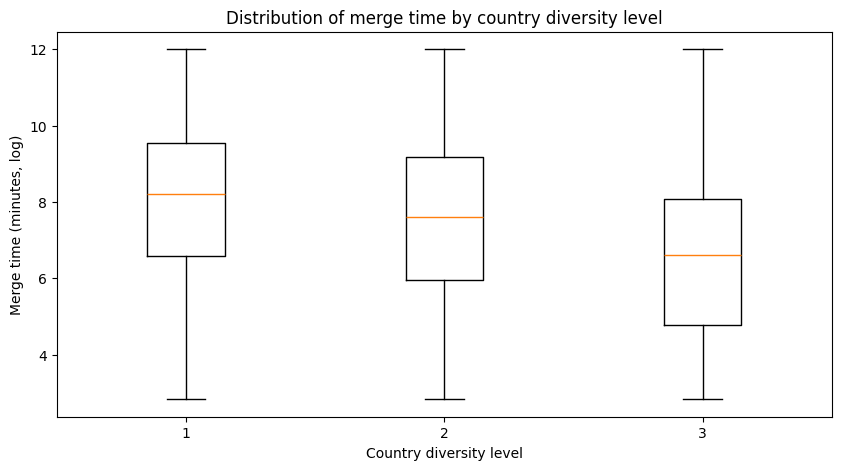

Kruskal-Wallis Test: Stat=5293.329757138476, P-value=0.0
Cliff's Delta for low vs medium: Delta=0.11368377753278333, P-value=negligible
Kruskal-Wallis Test (log): Stat=5293.329757138476, P-value=0.0
Cliff's Delta for low vs medium (log): Delta=0.11368377753278333, P-value=negligible
Mean merge time for low diversity: 14143.356001153144
Mean merge time for medium diversity: 11158.610654458433
Mean merge time for high diversity: 5874.555014647596
Median merge time for low diversity: 3644.0
Median merge time for medium diversity: 1996.0
Median merge time for high diversity: 733.0
Standard deviation of merge time for low diversity: 25818.827177104406
Standard deviation of merge time for medium diversity: 23548.001991506513
Standard deviation of merge time for high diversity: 16997.404136843452
Maximum merge time for low diversity: 162737.0
Maximum merge time for medium diversity: 161932.0
Maximum merge time for high diversity: 162714.0
Minimum merge time for low diversity: 16.0
Minimum mer

In [28]:
core_team = merged_data[merged_data['core_member'] == 1]
print('number of different project ids: {}'.format(len(core_team['project_id'].unique())))
core_team_merge_time = core_team.groupby('project_id').agg({
    'contrib_country': 'nunique',
    'mergetime_minutes': 'median',
    'team_size': 'mean'
}).rename(columns={'contrib_country': 'country_diversity', 'mergetime_minutes': 'median_mergetime_minutes', 'team_size': 'avg_team_size'})
core_team_merge_time['relative_country_diversity'] = core_team_merge_time['country_diversity'] / core_team_merge_time['avg_team_size']
grouped = core_team.groupby('project_id')

plt.figure(figsize=(10, 5))
plt.hist(core_team_merge_time['relative_country_diversity'], bins=100, alpha=0.6)
plt.xlabel('Country diversity')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Country diversity')
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(core_team_merge_time['median_mergetime_minutes'], bins=100, alpha=0.6)
plt.xlabel('Median merge time')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Median merge time of each team')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(core_team_merge_time['relative_country_diversity'], core_team_merge_time['median_mergetime_minutes'], alpha=0.6)
plt.xlabel('Country diversity')
plt.ylabel('Median merge time')
plt.title('Country diversity vs median merge time')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

plt.figure(figsize=(10, 5))
for id, group in grouped:
    plt.hist(group['mergetime_minutes'], bins=30, alpha=0.6, log=True)
plt.xlabel('Merge time')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Median merge time')
plt.show()


quantile_labels = ['Low', 'Medium', 'High']
core_team_merge_time['diversity_level'] = pd.qcut(core_team_merge_time['relative_country_diversity'], q=3, labels=quantile_labels)
core_team = core_team.merge(core_team_merge_time['diversity_level'], on='project_id', how='left')

times_low = core_team[core_team['diversity_level'] == 'Low']['mergetime_minutes']
times_medium = core_team[core_team['diversity_level'] == 'Medium']['mergetime_minutes']
times_high = core_team[core_team['diversity_level'] == 'High']['mergetime_minutes']

times_low_log = core_team[core_team['diversity_level'] == 'Low']['log_mergetime_minutes']
times_medium_log = core_team[core_team['diversity_level'] == 'Medium']['log_mergetime_minutes']
times_high_log = core_team[core_team['diversity_level'] == 'High']['log_mergetime_minutes']

plt.figure(figsize=(10, 5))
plt.boxplot([times_low, times_medium, times_high], data=core_team)
plt.xlabel('Country diversity level')
plt.ylabel('Merge time (minutes)')
plt.title('Distribution of merge time by country diversity level')
plt.show()

plt.figure(figsize=(10, 5))
plt.boxplot([times_low_log, times_medium_log, times_high_log], data=core_team)
plt.xlabel('Country diversity level')
plt.ylabel('Merge time (minutes, log)')
plt.title('Distribution of merge time by country diversity level')
plt.show()

stat, p = kruskal(times_low, times_medium, times_high)
print(f"Kruskal-Wallis Test: Stat={stat}, P-value={p}")

if p < 0.05:
    delta, res = cliffs_delta(times_low, times_medium)
    print(f"Cliff's Delta for low vs medium: Delta={delta}, P-value={res}")

stat, p = kruskal(times_low_log, times_medium_log, times_high_log)
print(f"Kruskal-Wallis Test (log): Stat={stat}, P-value={p}")

if p < 0.05:
    delta, res = cliffs_delta(times_low_log, times_medium_log)
    print(f"Cliff's Delta for low vs medium (log): Delta={delta}, P-value={res}")

print('Mean merge time for low diversity: {}'.format(times_low.mean()))
print('Mean merge time for medium diversity: {}'.format(times_medium.mean()))
print('Mean merge time for high diversity: {}'.format(times_high.mean()))
print('Median merge time for low diversity: {}'.format(times_low.median()))
print('Median merge time for medium diversity: {}'.format(times_medium.median()))
print('Median merge time for high diversity: {}'.format(times_high.median()))
print('Standard deviation of merge time for low diversity: {}'.format(times_low.std()))
print('Standard deviation of merge time for medium diversity: {}'.format(times_medium.std()))
print('Standard deviation of merge time for high diversity: {}'.format(times_high.std()))
print('Maximum merge time for low diversity: {}'.format(times_low.max()))
print('Maximum merge time for medium diversity: {}'.format(times_medium.max()))
print('Maximum merge time for high diversity: {}'.format(times_high.max()))
print('Minimum merge time for low diversity: {}'.format(times_low.min()))
print('Minimum merge time for medium diversity: {}'.format(times_medium.min()))
print('Minimum merge time for high diversity: {}'.format(times_high.min()))

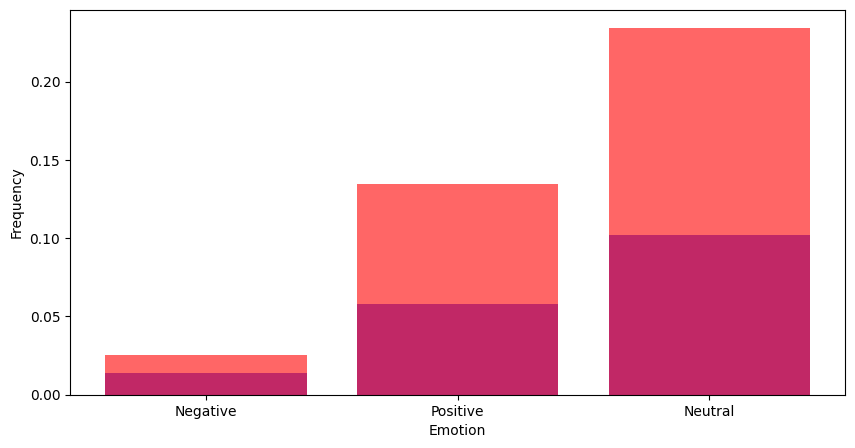

Shapiro-Wilk test for same country, negative emotion integrator: W = 0.12240339370383235, p = 8.73954551007438e-93
Shapiro-Wilk test for same county, positive emotion integrator: W = 0.284493012357925, p = 4.3348397533183113e-88
Shapiro-Wilk test for same country, neutral emotion integrator: W = 0.3824059366460629, p = 8.78644327544651e-85
Shapiro-Wilk test for different country, negative emotion integrator: W = 0.21234074997792807, p = 2.7748285372122504e-90
Shapiro-Wilk test for different country, positive emotion integrator: W = 0.47470302015843013, p = 3.210420189325133e-81
Shapiro-Wilk test for different country, neutral emotion integrator: W = 0.6041667612066738, p = 3.524972084570984e-75
Kruskal-Wallis H test, negative emotion integrator: H = 247.9809963211201, p = 7.1549679768897505e-56
Cliff's delta: -0.034159511215433105, interpretation: negligible
Kruskal-Wallis H test, positive emotion integrator: H = 1085.632673005586, p = 4.3808648729099595e-238
Cliff's delta: -0.12036833

In [29]:
# emotion
neg_same = same_country['perc_inte_neg_emo'].dropna()
pos_same = same_country['perc_inte_pos_emo'].dropna()
neu_same = same_country['perc_inte_neu_emo'].dropna()

neg_diff = not_same_country['perc_inte_neg_emo'].dropna()
pos_diff = not_same_country['perc_inte_pos_emo'].dropna()
neu_diff = not_same_country['perc_inte_neu_emo'].dropna()


plt.figure(figsize=(10, 5))
plt.bar(['Negative', 'Positive', 'Neutral'], [neg_same.mean(), pos_same.mean(), neu_same.mean()], alpha=0.6, color='blue')
plt.bar(['Negative', 'Positive', 'Neutral'], [neg_diff.mean(), pos_diff.mean(), neu_diff.mean()], alpha=0.6, color='red')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.show()

sample_size = 5000
same_sample_neg = neg_same.sample(n=sample_size, random_state=1)
same_sample_pos = pos_same.sample(n=sample_size, random_state=1)
same_sample_neu = neu_same.sample(n=sample_size, random_state=1)

diff_sample_neg = neg_diff.sample(n=sample_size, random_state=1)
diff_sample_pos = pos_diff.sample(n=sample_size, random_state=1)
diff_sample_neu = neu_diff.sample(n=sample_size, random_state=1)

res_same_neg = shapiro(same_sample_neg)
res_same_pos = shapiro(same_sample_pos)
res_same_neu = shapiro(same_sample_neu)

print('Shapiro-Wilk test for same country, negative emotion integrator: W = {}, p = {}'.format(res_same_neg.statistic, res_same_neg.pvalue))
print('Shapiro-Wilk test for same county, positive emotion integrator: W = {}, p = {}'.format(res_same_pos.statistic, res_same_pos.pvalue))
print('Shapiro-Wilk test for same country, neutral emotion integrator: W = {}, p = {}'.format(res_same_neu.statistic, res_same_neu.pvalue))

res_diff_neg = shapiro(diff_sample_neg)
res_diff_pos = shapiro(diff_sample_pos)
res_diff_neu = shapiro(diff_sample_neu)

print('Shapiro-Wilk test for different country, negative emotion integrator: W = {}, p = {}'.format(res_diff_neg.statistic, res_diff_neg.pvalue))
print('Shapiro-Wilk test for different country, positive emotion integrator: W = {}, p = {}'.format(res_diff_pos.statistic, res_diff_pos.pvalue))
print('Shapiro-Wilk test for different country, neutral emotion integrator: W = {}, p = {}'.format(res_diff_neu.statistic, res_diff_neu.pvalue))

H, p = kruskal(neg_same, neg_diff)
print('Kruskal-Wallis H test, negative emotion integrator: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(neg_same, neg_diff)
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))

H, p = kruskal(pos_same, pos_diff)
print('Kruskal-Wallis H test, positive emotion integrator: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(pos_same, pos_diff)
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))

H, p = kruskal(neu_same, neu_diff)
print('Kruskal-Wallis H test, neutral emotion integrator: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(neu_same, neu_diff)
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))

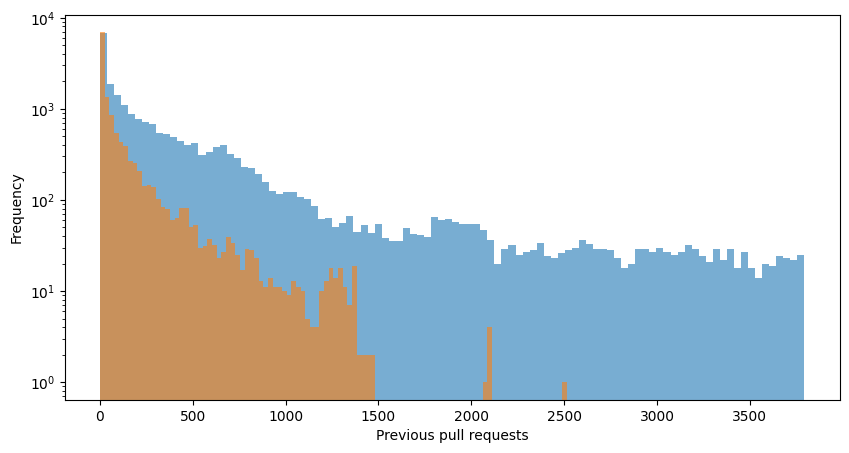

Shapiro-Wilk test for same country, previous pr: W = 0.650522487811792, p = 1.3500454871808423e-72
Shapiro-Wilk test for different country, previous pr: W = 0.5416834175112666, p = 2.8066080367853793e-78
Kruskal-Wallis H test, previous pr: H = 4700.1883599187495, p = 0.0
Cliff's delta: 0.4351007163110289, interpretation: medium


In [30]:
same_prev = same_country['prev_pullreqs']
diff_prev = not_same_country['prev_pullreqs']

plt.figure(figsize=(10, 5))
plt.hist(same_prev, bins=100, alpha=0.6, log=True)
plt.hist(diff_prev, bins=100, alpha=0.6, log=True)
plt.xlabel('Previous pull requests')
plt.ylabel('Frequency')
plt.show()

sample_size = 5000
same_sample_prev = same_prev.sample(n=sample_size, random_state=1)
diff_sample_prev = diff_prev.sample(n=sample_size, random_state=1)

res_same_prev = shapiro(same_sample_prev)
res_diff_prev = shapiro(diff_sample_prev)
print('Shapiro-Wilk test for same country, previous pr: W = {}, p = {}'.format(res_same_prev.statistic, res_same_prev.pvalue))
print('Shapiro-Wilk test for different country, previous pr: W = {}, p = {}'.format(res_diff_prev.statistic, res_diff_prev.pvalue))

H, p = kruskal(same_prev, diff_prev)
print('Kruskal-Wallis H test, previous pr: H = {}, p = {}'.format(H, p))

if p < 0.05:
    delta, res = cliffs_delta(same_prev, diff_prev)
    print('Cliff\'s delta: {}, interpretation: {}'.format(delta, res))